DATATHON - PROYECTO INDIVIDUAL II - /USUARIO614

In [51]:
#Importación de librerias

import pandas as pd
import numpy as np

In [52]:
#Leemos los archivos como dataframes

df_test = pd.read_csv(r'C:\Users\jotad\OneDrive\Documentos\Sebastian\Datathon COVID\Datathon\hospitalizaciones_test.csv')
df_train = pd.read_csv(r'C:\Users\jotad\OneDrive\Documentos\Sebastian\Datathon COVID\Datathon\hospitalizaciones_train.csv')

In [53]:
#Visualizamos 

df_test.head(3)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882


In [54]:
#Vemos qué información hay en el df

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

In [55]:
df_train.head(3)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [57]:
#Renombramos las columnas 

df_train.rename(columns = {'Available Extra Rooms in Hospital':'hab_disponibles', 
 'Department':'area_ingreso',
 'Ward_Facility_Code':'codigo_hab', 
 'doctor_name':'doctor',
 'staff_available':'personal',
 'patientid':'id_paciente',
 'Age':'rango_etario',
 'gender':'genero',
 'Type of Admission':'tipo_ingreso',
 'Severity of Illness':'gravedad',
 'health_conditions':'condicion_salud',
 'Visitors with Patient':'visitantes_paciente',
 'Insurance':'seguro_medico',
 'Admission_Deposit':'pago_inicial',
 'Stay (in days)':'estancia_dias'},inplace = True)

In [58]:
df_train.head(3)

,hab_disponibles,area_ingreso,codigo_hab,doctor,personal,id_paciente,rango_etario,genero,tipo_ingreso,gravedad,condicion_salud,visitantes_paciente,seguro_medico,pago_inicial,estancia_dias
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7


In [59]:
#Creo la columna target, donde tengo discriminado en estancias de hasta 7 dias (0) y estancias de 8 dias o más (1)

df_train["target"] = (df_train['estancia_dias'] >= 9).astype(int)

In [60]:
df_train.head(3)

,hab_disponibles,area_ingreso,codigo_hab,doctor,personal,id_paciente,rango_etario,genero,tipo_ingreso,gravedad,condicion_salud,visitantes_paciente,seguro_medico,pago_inicial,estancia_dias,target
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0


In [61]:
#Creamos un nuevo df solo con aquellas columnas que vamos a utilizar para nuestro modelo, dejando de lado aquellas columnas que no me aporten información relevante como ser 
#la columna 'visitantes_paciente', 'codigo_hab'

In [62]:
df_train1 = df_train.loc[:,['area_ingreso','doctor','rango_etario','genero','tipo_ingreso','gravedad','condicion_salud','seguro_medico','target']]

Visualizamos

In [63]:
df_train1

,area_ingreso,doctor,rango_etario,genero,tipo_ingreso,gravedad,condicion_salud,seguro_medico,target
0,gynecology,Dr Sophia,41-50,Female,Trauma,Extreme,Diabetes,Yes,0
1,gynecology,Dr Sophia,31-40,Female,Trauma,Minor,Heart disease,No,1
2,gynecology,Dr Sophia,21-30,Female,Trauma,Extreme,Diabetes,Yes,0
3,gynecology,Dr Olivia,31-40,Female,Urgent,Moderate,None,No,0
4,anesthesia,Dr Mark,71-80,Male,Trauma,Moderate,Diabetes,No,1
...,...,...,...,...,...,...,...,...,...
409995,gynecology,Dr Sarah,31-40,Female,Trauma,Minor,Asthama,Yes,0
409996,gynecology,Dr Nathan,21-30,Female,Trauma,Extreme,Other,No,1
409997,gynecology,Dr Sarah,21-30,Female,Emergency,Minor,Asthama,Yes,1
409998,gynecology,Dr Olivia,21-30,Female,Trauma,Moderate,Other,Yes,1


In [64]:
#Renombro las columnas de df_test y selecciono solo aquellas  que me son de utilidad para mi modelo.

In [65]:
#Renombramos las columnas 

df_test.rename(columns = {'Available Extra Rooms in Hospital':'hab_disponibles', 
 'Department':'area_ingreso',
 'Ward_Facility_Code':'codigo_hab', 
 'doctor_name':'doctor',
 'staff_available':'personal',
 'patientid':'id_paciente',
 'Age':'rango_etario',
 'gender':'genero',
 'Type of Admission':'tipo_ingreso',
 'Severity of Illness':'gravedad',
 'health_conditions':'condicion_salud',
 'Visitors with Patient':'visitantes_paciente',
 'Insurance':'seguro_medico',
 'Admission_Deposit':'pago_inicial',
 'Stay (in days)':'estancia_dias'},inplace = True)

In [66]:
df_test1 = df_test.loc[:,['area_ingreso','doctor','rango_etario','genero','tipo_ingreso','gravedad','condicion_salud','seguro_medico']]

In [67]:
df_test1

,area_ingreso,doctor,rango_etario,genero,tipo_ingreso,gravedad,condicion_salud,seguro_medico
0,gynecology,Dr Olivia,21-30,Female,Trauma,Moderate,Other,No
1,TB & Chest disease,Dr John,51-60,Female,Trauma,Moderate,Asthama,Yes
2,radiotherapy,Dr John,51-60,Other,Trauma,Moderate,None,No
3,gynecology,Dr Olivia,21-30,Female,Trauma,Moderate,None,Yes
4,anesthesia,Dr John,51-60,Female,Trauma,Extreme,Diabetes,No
...,...,...,...,...,...,...,...,...
89995,gynecology,Dr Sarah,11-20,Female,Trauma,Minor,High Blood Pressure,No
89996,gynecology,Dr Olivia,31-40,Female,Emergency,Moderate,Other,No
89997,gynecology,Dr Sarah,11-20,Female,Emergency,Moderate,High Blood Pressure,No
89998,radiotherapy,Dr John,61-70,Female,Trauma,Extreme,Diabetes,No


Convertimos las variables categóricas en variables indicadoras

In [68]:
df_train1 = pd.get_dummies(df_train1,drop_first = True)
df_test1 = pd.get_dummies(df_test1, drop_first=True)

In [69]:
df_train1.head(3)

,target,area_ingreso_anesthesia,area_ingreso_gynecology,area_ingreso_radiotherapy,area_ingreso_surgery,doctor_Dr John,doctor_Dr Mark,doctor_Dr Nathan,doctor_Dr Olivia,doctor_Dr Sam,...,tipo_ingreso_Trauma,tipo_ingreso_Urgent,gravedad_Minor,gravedad_Moderate,condicion_salud_Diabetes,condicion_salud_Heart disease,condicion_salud_High Blood Pressure,condicion_salud_None,condicion_salud_Other,seguro_medico_Yes
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


Importacion de librerías

In [70]:
import seaborn as sn
from sklearn import tree
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [71]:
x1 = df_train1.drop(['target'] ,axis = 1)
y1 = df_train1['target']

In [72]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

model =  RandomForestClassifier(random_state = 42)
model.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

<AxesSubplot:xlabel='important', ylabel='features'>

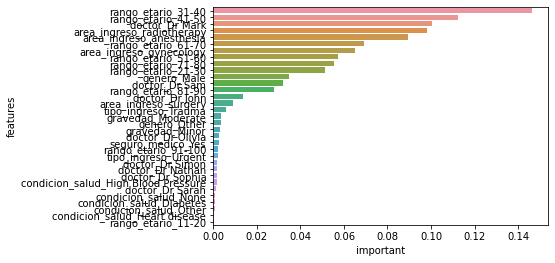

In [73]:
important_features = pd.DataFrame({'features': X_train1.columns, 
                                   'important': model.feature_importances_})
important_features = important_features.sort_values('important', ascending = False)

sn.barplot(x = 'important', y = 'features', data = important_features)

In [74]:
X = x1
y = y1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Escogemos el mejor parametro para el modelo

In [75]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 4,
                         n_jobs = -1)
    gscv.fit(X_train , y_train)
    result = gscv.best_params_
    return result

Model AdaBoostClassifier

In [76]:
gs_adb = AdaBoostClassifier(random_state = 0)
adb_params ={
    'n_estimators':[10, 50, 100, 250, 500, 500],
    'learning_rate':[0.001, 0.01, 0.1, 1]}
print(f'Best parameters for AdaBoost: ', gridsearch(gs_adb , adb_params))

Model RandomForestClassifier

In [ ]:
gs_rf = RandomForestClassifier(random_state = 42)
rf_params = {
 'n_estimators':[200,500],
 'criterion': ('gini','entropy'),
 'max_depth': [2, 3 ,4, 5, 6, 7, 8],
 'min_samples_split': [2, 9],
 'max_features': ("auto", "sqrt", "log2") }
print('Best parameters for Random Forest: ', gridsearch(gs_rf , rf_params))

c:\Users\jotad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
xgb_gs =  XGBClassifier(random_state = 0, verbosity = 0)
xgb_params =  {'n_estimators':[200,300],
              'learning_rate':[0.1,0.2]} 
print(f'Best parameters for XGBoost: ', gridsearch(xgb_gs , xgb_params))

Best parameters for XGBoost:  {'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
lr  = LogisticRegression(random_state=0, penalty = 'l2')
knn = KNeighborsClassifier(n_neighbors= 11)
rf  = RandomForestClassifier(max_depth=7, random_state=42 , criterion= 'gini' , max_features='auto' , min_samples_split= 2 , n_estimators= 200)
adb  = AdaBoostClassifier(n_estimators=10, learning_rate = 1, random_state=0)
xgb = XGBClassifier(random_state= 0 , learning_rate= 0.1 , n_estimators= 200)

Metricas del modelo

In [ ]:
def creport(model):
    ypred = model.predict(X_test)
    return classification_report(y_test, ypred)

In [ ]:
def accuracy(y_test , ypred):
    return accuracy_score(y_test , ypred)

In [ ]:
def f1(y_test , ypred):
    return f1_score(y_test, ypred, average='macro')

In [ ]:
random_forest = rf
random_forest.fit(X_train,y_train)
print(creport(random_forest))

c:\Users\jotad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       1.00      0.16      0.28     31011
           1       0.66      1.00      0.80     50989

    accuracy                           0.68     82000
   macro avg       0.83      0.58      0.54     82000
weighted avg       0.79      0.68      0.60     82000



In [ ]:
KNN = knn
KNN.fit(X_train,y_train)
print(creport(KNN))

              precision    recall  f1-score   support

           0       0.57      0.48      0.52     31011
           1       0.71      0.78      0.75     50989

    accuracy                           0.67     82000
   macro avg       0.64      0.63      0.64     82000
weighted avg       0.66      0.67      0.66     82000



In [ ]:
logistic_regression = lr
logistic_regression.fit(X_train,y_train)
print(creport(logistic_regression))

              precision    recall  f1-score   support

           0       0.55      0.40      0.46     31011
           1       0.69      0.80      0.74     50989

    accuracy                           0.65     82000
   macro avg       0.62      0.60      0.60     82000
weighted avg       0.63      0.65      0.63     82000



c:\Users\jotad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
XGB = xgb
XGB.fit(X_train , y_train)
print(creport(XGB))

              precision    recall  f1-score   support

           0       0.78      0.24      0.37     31011
           1       0.67      0.96      0.79     50989

    accuracy                           0.69     82000
   macro avg       0.73      0.60      0.58     82000
weighted avg       0.71      0.69      0.63     82000



In [ ]:
ADA = adb
ADA.fit(X_train , y_train)
print(creport(ADA))

              precision    recall  f1-score   support

           0       0.72      0.17      0.28     31011
           1       0.66      0.96      0.78     50989

    accuracy                           0.66     82000
   macro avg       0.69      0.56      0.53     82000
weighted avg       0.68      0.66      0.59     82000



Evaluacion de modelos de prediccion

In [ ]:
y_train_pred_rf = random_forest.predict(X_train)
y_train_pred_knn = KNN.predict(X_train)
y_train_pred_lr = logistic_regression.predict(X_train)
y_train_pred_ada = ADA.predict(X_train)

In [ ]:
y_test_pred_rf = random_forest.predict(X_test)
y_test_pred_knn = KNN.predict(X_test)
y_test_pred_lr = logistic_regression.predict(X_test)
y_test_pred_ada = ADA.predict(X_test)

In [ ]:
all_evaluate = pd.DataFrame({'Model':['Random Forest', 'KNN', 'Logistic Regression', 'AdaBoost'],
    'Train Accuracy':[accuracy(y_train,y_train_pred_rf), accuracy(y_train,y_train_pred_knn), accuracy(y_train,y_train_pred_lr),
                     accuracy(y_train,y_train_pred_ada)],
    'Test Accuracy':[accuracy(y_test,y_test_pred_rf), accuracy(y_test,y_test_pred_knn), accuracy(y_test,y_test_pred_lr),
                     accuracy(y_test,y_test_pred_ada)],
                                      
    'f1-score':[f1(y_test,y_test_pred_rf), f1(y_test,y_test_pred_knn), f1(y_test,y_test_pred_lr),
                     f1(y_test,y_test_pred_ada)]}
                     )

print(all_evaluate)

                 Model  Train Accuracy  Test Accuracy  f1-score
0        Random Forest        0.684387       0.682756  0.537151
1                  KNN        0.668265       0.668817  0.635168
2  Logistic Regression        0.649659       0.647378  0.600463
3             AdaBoost        0.661704       0.660585  0.526842


In [ ]:
y_pred = rf.predict(df_test1)
file = pd.DataFrame(y_pred, columns = ['pred'])
file.to_csv('usuario614.csv', index = False)

In [ ]:
df_train1['target'].value_counts()

1    255416
0    154584
Name: target, dtype: int64

In [ ]:
jp= pd.read_csv(r'usuario614.csv')

In [ ]:
jp.value_counts()

pred
1       84831
0        5169
dtype: int64